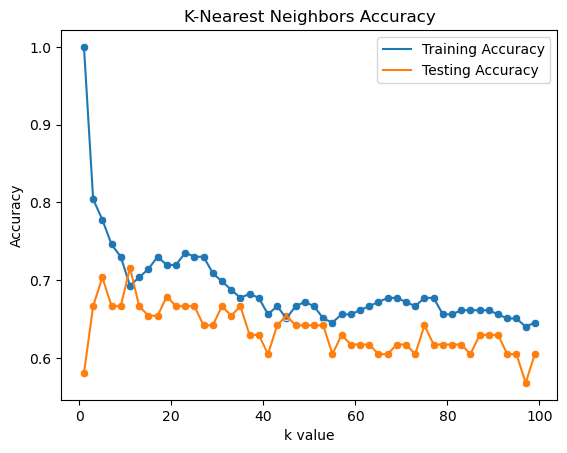

This is the best K for KNeighbors Classifier:  11 
Accuracy score is: 71.60%


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load the dataset
dataset = pd.read_csv("D:/Y 3/T 2/ML/MLProject/Heart_Disease_Prediction.csv")

# Rename the column for consistency
dataset.rename(columns={"Heart Disease": "Heart_Disease"}, inplace=True)

# Map the target column to numerical values
dataset["Heart_Disease"] = dataset["Heart_Disease"].map({'Absence': 0, 'Presence': 1}).astype(int)

# Define features and target variable
x = dataset.drop(["Heart_Disease"], axis=1)
y = dataset["Heart_Disease"].values

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

# Find the best k value
k = range(1, 100, 2)  # Odd values of k between 1 and 99
testing_accuracy = []
training_accuracy = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)

    # Training accuracy
    y_predict_train = knn.predict(x_train)
    training_accuracy.append(accuracy_score(y_train, y_predict_train))

    # Testing accuracy
    y_predict_test = knn.predict(x_test)
    acc_score = accuracy_score(y_test, y_predict_test)
    testing_accuracy.append(acc_score)

    # Update best k value if current k gives a better accuracy
    if score < acc_score:
        knn_ac = acc_score * 100
        best_k = i
        score = acc_score

# Plot the results
sns.lineplot(x=k, y=training_accuracy, label='Training Accuracy')
sns.scatterplot(x=k, y=training_accuracy)

sns.lineplot(x=k, y=testing_accuracy, label='Testing Accuracy')
sns.scatterplot(x=k, y=testing_accuracy)

plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Accuracy')
plt.legend()
plt.show()

# Print the best k value
print('This is the best K for KNeighbors Classifier: ', best_k, '\nAccuracy score is: {:.2f}%'.format(knn_ac))


In [18]:
#KMeans

import numpy as np 
import pandas as pd 
dataset = pd.read_csv("D:/Y 3/T 2/ML/MLProject/Heart_Disease_Prediction.csv")
print(dataset.shape)
print(dataset.head())
check_values = dataset['Heart Disease']
dataset = dataset.drop(['Heart Disease'] , axis=1)
dataset.head()
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(dataset)
labels = kmeans.labels_
dataset['clusters']=labels
dataset.head()
comparison_dataset = pd.concat([check_values,dataset.clusters],axis=1)
comparison_dataset.head()
M0 = pd.Series(check_values.replace(['Absence',"Presence"],[0,1]))
comparison_dataset = pd.concat([comparison_dataset,M0],axis=1)
comparison_dataset.head()
comparison_dataset.columns = ['Heart Disease','clusters','M0']
comparison_dataset.head()
correct = len(comparison_dataset[comparison_dataset['M0'] == comparison_dataset['clusters']])
total = len(dataset)
kmean_ac = (correct/total)*100
print(correct,total, kmean_ac)

(270, 14)
   Age  Sex  Chest pain type   BP  Cholesterol  FBS over 120  EKG results  \
0   70    1                4  130          322             0            2   
1   67    0                3  115          564             0            2   
2   57    1                2  124          261             0            0   
3   64    1                4  128          263             0            0   
4   74    0                2  120          269             0            2   

   Max HR  Exercise angina  ST depression  Slope of ST  \
0     109                0            2.4            2   
1     160                0            1.6            2   
2     141                0            0.3            1   
3     105                1            0.2            2   
4     121                1            0.2            1   

   Number of vessels fluro  Thallium Heart Disease  
0                        3         3      Presence  
1                        0         7       Absence  
2                  

In [21]:
#DecisionTreeClassifier

import pandas 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dataset = pd.read_csv("D:/Y 3/T 2/ML/MLProject/Heart_Disease_Prediction.csv")
dataset.rename(columns={"Heart Disease": "Heart_Disease"}, inplace=True)
dataset.head()
dataset["Heart_Disease"]=dataset["Heart_Disease"].map({'Absence':0,'Presence':1}).astype(int)
x = dataset.drop(["Heart_Disease"],axis = 1)
y = dataset.Heart_Disease.values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)
k = range(1,100,2)
testing_accuracy = []
training_accuracy = []
score = 0
for i in k:
 dt = DecisionTreeClassifier(max_depth = i)
 dt.fit(x_train, y_train)
 y_predict_train = dt.predict(x_train)
 training_accuracy.append(accuracy_score(y_train, y_predict_train))
 y_predict_test = dt.predict(x_test)
 acc_score = accuracy_score(y_test,y_predict_test)
 testing_accuracy.append(acc_score)
 if score < acc_score:
  score = acc_score
  best_k = i
dtree_ac =  score*100  
print('This is the max_depth: ', best_k, '\nAccuracy score is: ', dtree_ac)

This is the max_depth:  3 
Accuracy score is:  82.71604938271605


In [23]:
#MLPClassifier

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
from sklearn.preprocessing import Normalizer, MinMaxScaler, StandardScaler, RobustScaler, QuantileTransformer, LabelEncoder
from sklearn.pipeline import Pipeline



dataset = pd.read_csv("D:/Y 3/T 2/ML/MLProject/Heart_Disease_Prediction.csv")
dataset.rename(columns={"Heart Disease": "Heart_Disease"}, inplace=True)



dataset.head()




dataset.groupby('Heart_Disease').size()


# Feature "Age" is not useful 
x = dataset.drop(['Heart_Disease'],axis=1)
# "Heart_Disease" feature is our class which I wanna predict
y = dataset.Heart_Disease



x.head()




y.head()




class_le = LabelEncoder()
# M -> 1 and B -> 0
y = class_le.fit_transform(dataset.Heart_Disease.values)




print(y)




X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=0.32)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)




scaler = StandardScaler()

print('\nData preprocessing with {scaler}\n'.format(scaler=scaler))

X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.transform(X_test)




mlp = MLPClassifier(
    max_iter=1000,
    alpha=0.1,
    activation='logistic',
    solver='adam',
    random_state=42
)
mlp.fit(X_train_scaler, y_train)

mlp_predict = mlp.predict(X_test_scaler)
p_ac = (accuracy_score(y_test, mlp_predict)*100)
print('MLP Accuracy: ' ,p_ac)

[1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 1
 1 0 0 1 0 0 0 1 0 1 1 1 1 1 0 0 0 0 0 1 0 1 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 1
 0 1 0 0 0 1 1 0 1 1 1 1 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 1
 1 0 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 0 1 1
 0 1 0 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 0 0 0 1 1
 0 0 1 1 0 1 0 0 0 0 1]
(183, 13) (183,)
(87, 13) (87,)

Data preprocessing with StandardScaler()

MLP Accuracy:  81.60919540229885


Missing values per column:
 Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart_Disease              0
dtype: int64

Target value counts:
 Absence     150
Presence    120
Name: Heart_Disease, dtype: int64


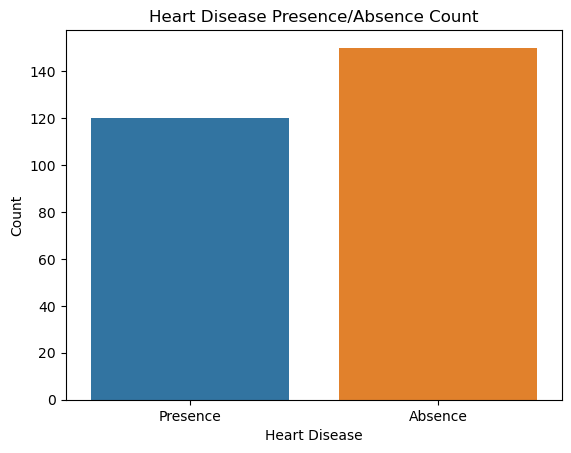

Original data shape: (270, 13)
Training data shape: (189, 13)
Testing data shape: (81, 13)
Training set accuracy: 84.66%
Testing set accuracy: 87.65%


In [30]:
#LogisticRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load dataset
data = pd.read_csv("D:/Y 3/T 2/ML/MLProject/Heart_Disease_Prediction.csv")
data.rename(columns={"Heart Disease": "Heart_Disease"}, inplace=True)

# Check for missing values
print("Missing values per column:\n", data.isnull().sum())

# Check target variable distribution
print("\nTarget value counts:\n", data['Heart_Disease'].value_counts())

# Plot the distribution of the target variable
sns.countplot(x='Heart_Disease', data=data)
plt.title('Heart Disease Presence/Absence Count')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Define features and target variable
x = data.drop(columns='Heart_Disease', axis=1)  # Features
y = data['Heart_Disease']  # Target variable

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, stratify=y, random_state=42
)

# Standardize the features
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Print dataset shapes
print(f"Original data shape: {x.shape}")
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")

# Train the Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Evaluate the model
x_train_pred = model.predict(x_train)
train_acc = accuracy_score(y_train, x_train_pred) * 100
print("Training set accuracy: {:.2f}%".format(train_acc))

x_test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, x_test_pred) * 100
print("Testing set accuracy: {:.2f}%".format(test_acc))



Text(0.5, 1.0, 'Model Accracy')

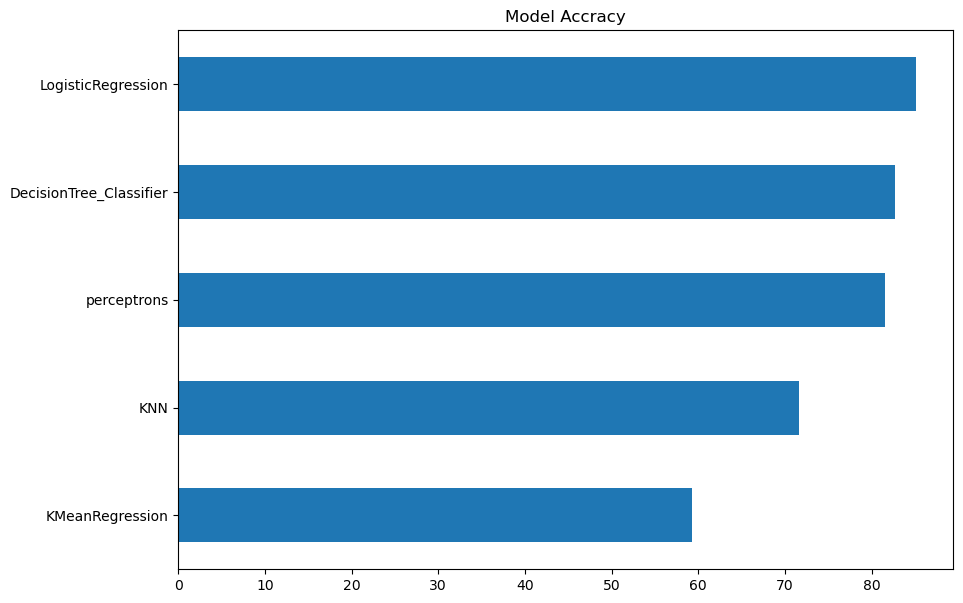

In [31]:
model_accuracy = pd.Series(data=[lr_ac,p_ac,kmean_ac,dtree_ac,knn_ac], 
                index=['LogisticRegression','perceptrons',
                                      'KMeanRegression','DecisionTree_Classifier','KNN'])
fig= plt.figure(figsize=(10,7))
model_accuracy.sort_values().plot.barh()
plt.title('Model Accracy')